In [102]:
#PART 1: REGRESSION INTRODUCTION
#!pip install quandl

In [103]:
import sklearn
#import quandl
import pandas as pd

#df= quandl.get('WIKI/GOOGL')

#print(df.head())

In [104]:
'''from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')'''

"from google.colab import files\n\ndf.to_csv('df.csv')\nfiles.download('df.csv')"

In [105]:
!pip install PyDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
df_path='/content/drive/My Drive/Datasets/Google stock prices/df.csv' 
df=pd.read_csv(df_path,header=0, index_col='Date',parse_dates=True)
#print(df.columns)

In [107]:
#Select columns that are needed
df= df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close','Adj. Volume']]

#Add a column with the values of high low percentage
df['HL_PCT']= (df['Adj. High']- df['Adj. Close'])/ df['Adj. Close'] * 100.0

#Calculate percentage change
df['PCT_change']= (df['Adj. Close']- df['Adj. Open'])/ df['Adj. Open'] * 100.0

#Re-define necessary columns
df= df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]

#df.head()



In [108]:
#PART 2: FEATURES AND LABELS
forecast_col= 'Adj. Close' #The name of the column that we will be forecasting  
df.fillna(-99999, inplace=True) #Fill all the places with missing values with -99999. inplace=True is used to modify the values in the origial dataframe and not return a copy 

import math
forecast_out= int(math.ceil(0.01*len(df))) #Predict value 1% of total days forward

df['label']= df[forecast_col].shift(-forecast_out)  #shifting rows of the column to be forecasted upwards

df.dropna(inplace=True)

print(df.head())
print(df.tail())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849
            Adj. Close    HL_PCT  PCT_change  Adj. Volume    label
Date                                                              
2018-01-30     1177.37  0.896914   -0.029718    1792602.0  1094.00
2018-01-31     1182.22  0.346805   -0.134312    1643877.0  1053.15
2018-02-01     1181.59  0.495942    0.476195    2774967.0  1026.55
2018-02-02     1119.20  1.081129   -0.729098    5798880.0  1054.09
2018-02-05     1068.76  4.325574   -2.893850    3742469.0  1006.94


In [109]:
#PART 3: REGRESSION TRAINING AND TESTING
import numpy as np
from sklearn import preprocessing, svm #for scaling features and other metrics | separate data into train and test
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate


X = np.array(df.drop(['label'],1)) #store features

#Part 4 change
X = preprocessing.scale(X) #Normalising values between -1 and 1
X_lately=X[-forecast_out:]
X=X[:-forecast_out]


df.dropna(inplace=True)

y = np.array(df['label']) #store label
y_lately=y[-forecast_out:]
y=y[:-forecast_out]
#y = y.dropna(inplace=True)


#X = X[:-forecast_out + 1]


#

In [110]:
print(len(X), len(y)) #check to see whether features and labels are of same length 

3354 3354


In [111]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2) #shuffle and split the data into train and test sets

clf= LinearRegression()
clf.fit(X_train, y_train) #synonymous to training
accuracy= clf.score(X_test, y_test) #synonymous to testing

#print(accuracy)

In [112]:
#Using Support Vector Machine to switch algorithms
#We replace it with Support Vector Regression

#clf= svm.SVR()
'''clf= svm.SVR(kernel='poly')
clf.fit(X_train, y_train) #synonymous to training
accuracy= clf.score(X_test, y_test) #synonymous to testing'''

#print(accuracy)

"clf= svm.SVR(kernel='poly')\nclf.fit(X_train, y_train) #synonymous to training\naccuracy= clf.score(X_test, y_test) #synonymous to testing"

In [113]:
#PART 4: FORECASTING AND PREDICTING
forecast_set = clf.predict(X_lately) 

print(forecast_set, accuracy, forecast_out)

[1081.94307824 1096.77982865 1110.64565791 1105.16091462 1098.65404196
 1095.98436994 1094.29363461 1091.22644957 1085.09404135 1080.70767845
 1078.34358568 1098.24623209 1116.80298695 1121.17321099 1136.19576175
 1140.19960876 1138.77766504 1136.25889181 1138.03817452 1156.83761462
 1156.03452368 1165.86416505 1162.43870033 1170.28770916 1190.94611392
 1203.31326976 1197.63483369 1209.51854566 1215.1177754  1213.33045301
 1204.03585103 1209.49136413 1208.35147886 1143.76255533 1090.50142808] 0.9781932453235451 35


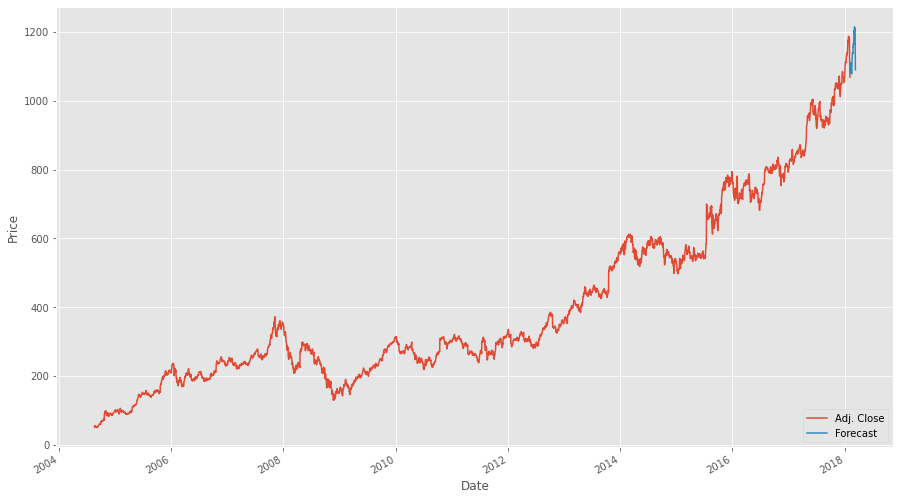

In [114]:
import datetime 
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

df['Forecast'] = np.nan
last_date = df.iloc[-1].name


last_unix = last_date.timestamp()

one_day = 86400
next_unix = last_unix + one_day 

for i in forecast_set:
  next_date=datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
#plt.rcParams["figure.figsize"] = [15,9]

plt.show()